# Ch1_실습

> 9/2, 2022

## 1. 텐서 데이터 만들기

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
test = tf.constant(123)

2022-09-16 15:24:48.644298: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-16 15:24:48.644407: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [3]:
test

<tf.Tensor: shape=(), dtype=int32, numpy=123>

In [4]:
print(test)

tf.Tensor(123, shape=(), dtype=int32)


In [5]:
test.numpy()

123

In [6]:
tf.constant([1.2, 5, np.pi], dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.2      , 5.       , 3.1415927], dtype=float32)>

In [7]:
ndarr = np.array([[1, 2, 3], [4, 5, 6]])
ndarr

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
tsarr = tf.convert_to_tensor(ndarr)
tsarr

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

## 2. 텐서 데이터 타입, 크기

In [9]:
tsarr.shape

TensorShape([2, 3])

In [10]:
tsarr.ndim

2

In [11]:
tsarr.dtype

tf.int64

In [12]:
'''텐서를 새로운 형태로 캐스팅하는데 사용'''
tf.cast(tsarr, dtype=tf.float64)

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]])>

In [13]:
t = tf.random.uniform(shape=(3,4))
t.numpy()

array([[0.7616675 , 0.10874474, 0.31633246, 0.7931069 ],
       [0.0094167 , 0.4497099 , 0.661577  , 0.8408805 ],
       [0.35615516, 0.74151087, 0.95126843, 0.02696645]], dtype=float32)

In [14]:
t_tr = tf.transpose(t)
t_tr.numpy()

array([[0.7616675 , 0.0094167 , 0.35615516],
       [0.10874474, 0.4497099 , 0.74151087],
       [0.31633246, 0.661577  , 0.95126843],
       [0.7931069 , 0.8408805 , 0.02696645]], dtype=float32)

In [15]:
t_sh = tf.reshape(t, shape=(6,2))
t_sh.numpy()

array([[0.7616675 , 0.10874474],
       [0.31633246, 0.7931069 ],
       [0.0094167 , 0.4497099 ],
       [0.661577  , 0.8408805 ],
       [0.35615516, 0.74151087],
       [0.95126843, 0.02696645]], dtype=float32)

## 3. 수학 연산의 적용

In [16]:
a = tf.constant(10)
b = tf.constant(20)
c = tf.constant(30)

In [17]:
'''텐서 꼬라지 : shape=(), dtype=**, numpy=() 이고 이걸 부르면 됨'''

'텐서 꼬라지 : shape=(), dtype=**, numpy=() 이고 이걸 부르면 됨'

In [18]:
ad = tf.add(a, b)
ad.numpy()

30

In [19]:
sb = tf.subtract(a, b)
sb.numpy()

-10

In [20]:
ml = tf.multiply(a, b)
ml.numpy()

200

In [21]:
dv = tf.divide(a, b)
dv.numpy()

0.5

In [22]:
'''평균같은거, 특정 차원을 제거하고 평균 구함 >> 즉 스칼라 나옴'''
tf.reduce_mean([a, b, c]).numpy()

20

In [23]:
'''특정 차원을 제거하고 합을 구함 >> 결국 스칼라 구함'''
tf.reduce_sum([a, b, c]).numpy()

60

In [24]:
'''Uniform 분포'''
M1 = tf.random.uniform( shape=(5,2), minval = -1.0, maxval = 1.0 )
M1.numpy()

array([[ 0.523335  , -0.7825105 ],
       [-0.36733508,  0.5862138 ],
       [-0.9811666 , -0.10058022],
       [ 0.32315397,  0.681761  ],
       [-0.2876897 ,  0.48302174]], dtype=float32)

In [25]:
M2 = tf.random.normal( shape = (5,2), mean = 0.0, stddev = 1.0)
M2.numpy()

array([[-0.5344868 ,  0.21918245],
       [ 2.1869078 , -1.173357  ],
       [ 0.91499674, -0.79123557],
       [ 0.9765298 ,  0.7357058 ],
       [-1.0643325 ,  1.4019252 ]], dtype=float32)

In [26]:
tf.reduce_mean( M1, axis=0 ).numpy()

array([-0.15794049,  0.17358117], dtype=float32)

In [27]:
tf.multiply( M1, M2 ).numpy()

array([[-0.27971563, -0.17151257],
       [-0.8033279 , -0.6878381 ],
       [-0.89776427,  0.07958265],
       [ 0.3155695 ,  0.5015755 ],
       [ 0.30619746,  0.6771603 ]], dtype=float32)

In [28]:
tf.matmul( M1, tf.transpose(M2))

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-0.4512282 ,  2.0626495 ,  1.0979999 , -0.06464535, -1.6540236 ],
       [ 0.32482353, -1.491166  , -0.7999436 ,  0.07256727,  1.2127947 ],
       [ 0.5023751 , -2.0277045 , -0.8181816 , -1.0321358 ,  0.90328157],
       [-0.02329147, -0.09324112, -0.24374877,  0.817145  ,  0.61183465],
       [ 0.25963622, -1.1959078 , -0.6454191 ,  0.07442433,  0.9833578 ]],
      dtype=float32)>

In [29]:
tf.matmul(tf.transpose(M1), M2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.3590407 ,  1.1564817 ],
       [ 1.7598705 ,  0.39896783]], dtype=float32)>

In [30]:
tf.transpose(M1) @ M2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.3590407 ,  1.1564817 ],
       [ 1.7598705 ,  0.39896783]], dtype=float32)>

In [31]:
np.linalg.det(M1 @ tf.transpose(M2))

-2.4123616e-23

In [32]:
np.linalg.inv(tf.transpose(M1) @ M2)

array([[-0.15479039,  0.44868845],
       [ 0.68278944,  0.5272767 ]], dtype=float32)

In [33]:
np.linalg.eig(tf.transpose(M1) @ M2)

(array([-2.1557174,  1.1956445], dtype=float32),
 array([[-0.8235112 , -0.41240194],
        [ 0.5673    , -0.911002  ]], dtype=float32))

In [34]:
tf.norm(M1, ord=2, axis=1).numpy()

array([0.94138324, 0.691796  , 0.98630846, 0.75447106, 0.5622058 ],
      dtype=float32)

## 4. 텐서 데이터의 분할 및 통합

In [35]:
t = tf.random.uniform((6,))
t.numpy()

array([0.7616675 , 0.10874474, 0.31633246, 0.7931069 , 0.0094167 ,
       0.4497099 ], dtype=float32)

In [36]:
t_spl = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_spl]

[array([0.7616675 , 0.10874474], dtype=float32),
 array([0.31633246, 0.7931069 ], dtype=float32),
 array([0.0094167, 0.4497099], dtype=float32)]

In [37]:
t2 = tf.random.uniform((6,3))
t2.numpy()

array([[0.7616675 , 0.10874474, 0.31633246],
       [0.7931069 , 0.0094167 , 0.4497099 ],
       [0.661577  , 0.8408805 , 0.35615516],
       [0.74151087, 0.95126843, 0.02696645],
       [0.55506694, 0.85192037, 0.6035267 ],
       [0.35154068, 0.59561145, 0.10358393]], dtype=float32)

In [38]:
t_spl2 = tf.split(t2, num_or_size_splits=[4,2])
[item.numpy() for item in t_spl2]

[array([[0.7616675 , 0.10874474, 0.31633246],
        [0.7931069 , 0.0094167 , 0.4497099 ],
        [0.661577  , 0.8408805 , 0.35615516],
        [0.74151087, 0.95126843, 0.02696645]], dtype=float32),
 array([[0.55506694, 0.85192037, 0.6035267 ],
        [0.35154068, 0.59561145, 0.10358393]], dtype=float32)]

In [39]:
t_spl3 = tf.split(t2,num_or_size_splits=[4,2], axis=0)
[item.numpy() for item in t_spl3]

[array([[0.7616675 , 0.10874474, 0.31633246],
        [0.7931069 , 0.0094167 , 0.4497099 ],
        [0.661577  , 0.8408805 , 0.35615516],
        [0.74151087, 0.95126843, 0.02696645]], dtype=float32),
 array([[0.55506694, 0.85192037, 0.6035267 ],
        [0.35154068, 0.59561145, 0.10358393]], dtype=float32)]

In [40]:
t_conc = tf.concat([t2, tf.reshape(t, (6,1))], axis=1)
t_conc.numpy()

array([[0.7616675 , 0.10874474, 0.31633246, 0.7616675 ],
       [0.7931069 , 0.0094167 , 0.4497099 , 0.10874474],
       [0.661577  , 0.8408805 , 0.35615516, 0.31633246],
       [0.74151087, 0.95126843, 0.02696645, 0.7931069 ],
       [0.55506694, 0.85192037, 0.6035267 , 0.0094167 ],
       [0.35154068, 0.59561145, 0.10358393, 0.4497099 ]], dtype=float32)

In [41]:
tf.concat([t_conc, tf.random.uniform((1,4))], axis=0)

<tf.Tensor: shape=(7, 4), dtype=float32, numpy=
array([[0.7616675 , 0.10874474, 0.31633246, 0.7616675 ],
       [0.7931069 , 0.0094167 , 0.4497099 , 0.10874474],
       [0.661577  , 0.8408805 , 0.35615516, 0.31633246],
       [0.74151087, 0.95126843, 0.02696645, 0.7931069 ],
       [0.55506694, 0.85192037, 0.6035267 , 0.0094167 ],
       [0.35154068, 0.59561145, 0.10358393, 0.4497099 ],
       [0.7616675 , 0.10874474, 0.31633246, 0.7931069 ]], dtype=float32)>

## 5. tf.data를 활용한 데이터 전처리

In [42]:
arr1 = [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7]
arr1

[1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7]

In [43]:
ds1 = tf.data.Dataset.from_tensor_slices(arr1)
print(ds1)

<TensorSliceDataset shapes: (), types: tf.float32>


In [44]:
for item in ds1:
    print(item)

tf.Tensor(1.1, shape=(), dtype=float32)
tf.Tensor(2.2, shape=(), dtype=float32)
tf.Tensor(3.3, shape=(), dtype=float32)
tf.Tensor(4.4, shape=(), dtype=float32)
tf.Tensor(5.5, shape=(), dtype=float32)
tf.Tensor(6.6, shape=(), dtype=float32)
tf.Tensor(7.7, shape=(), dtype=float32)


In [45]:
ds1_batch = ds1.batch(3)
for item in ds1_batch:
    print(item)

tf.Tensor([1.1 2.2 3.3], shape=(3,), dtype=float32)
tf.Tensor([4.4 5.5 6.6], shape=(3,), dtype=float32)
tf.Tensor([7.7], shape=(1,), dtype=float32)


In [46]:
tf.random.set_seed(1)
X = tf.random.uniform(shape=(10,3), dtype=tf.float32)
Y = tf.range(1, 11)

In [47]:
X.numpy()

array([[0.22721505, 0.46685362, 0.18047357],
       [0.54388   , 0.1589073 , 0.7124685 ],
       [0.29731095, 0.01537108, 0.41788483],
       [0.17046809, 0.56689847, 0.8050971 ],
       [0.27858877, 0.2300477 , 0.71309495],
       [0.30758882, 0.62882245, 0.7907176 ],
       [0.5688009 , 0.59878814, 0.5122006 ],
       [0.758917  , 0.66667914, 0.9368491 ],
       [0.03850842, 0.74011517, 0.96218586],
       [0.8567523 , 0.47222304, 0.9584228 ]], dtype=float32)

In [48]:
Y.numpy()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [49]:
ds_X = tf.data.Dataset.from_tensor_slices(X)
ds_Y = tf.data.Dataset.from_tensor_slices(Y)
ds_joint = tf.data.Dataset.zip((ds_X, ds_Y))

In [50]:
for item in ds_joint:
    print(item[0].numpy(), ':', item[1].numpy())

[0.22721505 0.46685362 0.18047357] : 1
[0.54388   0.1589073 0.7124685] : 2
[0.29731095 0.01537108 0.41788483] : 3
[0.17046809 0.56689847 0.8050971 ] : 4
[0.27858877 0.2300477  0.71309495] : 5
[0.30758882 0.62882245 0.7907176 ] : 6
[0.5688009  0.59878814 0.5122006 ] : 7
[0.758917   0.66667914 0.9368491 ] : 8
[0.03850842 0.74011517 0.96218586] : 9
[0.8567523  0.47222304 0.9584228 ] : 10


In [51]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1, y/10))

In [52]:
for item in ds_trans:
    print(item[0].numpy(), ':', item[1].numpy())

[-0.5455699  -0.06629276 -0.63905287] : 0.1
[ 0.08775997 -0.6821854   0.424937  ] : 0.2
[-0.4053781  -0.96925783 -0.16423035] : 0.3
[-0.6590638   0.13379693  0.6101942 ] : 0.4
[-0.44282246 -0.5399046   0.4261899 ] : 0.5
[-0.38482237  0.2576449   0.5814352 ] : 0.6
[0.13760185 0.19757628 0.02440119] : 0.7
[0.51783395 0.3333583  0.87369823] : 0.8
[-0.92298317  0.48023033  0.9243717 ] : 0.9
[ 0.71350455 -0.05555391  0.91684556] : 1.0


2022-09-16 15:24:51.417428: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [53]:
ds_shfl = ds_joint.shuffle(buffer_size = len(X))
for item in ds_shfl:
    print(item[0].numpy(), ':', item[1].numpy())

[0.17046809 0.56689847 0.8050971 ] : 4
[0.03850842 0.74011517 0.96218586] : 9
[0.22721505 0.46685362 0.18047357] : 1
[0.8567523  0.47222304 0.9584228 ] : 10
[0.54388   0.1589073 0.7124685] : 2
[0.5688009  0.59878814 0.5122006 ] : 7
[0.758917   0.66667914 0.9368491 ] : 8
[0.30758882 0.62882245 0.7907176 ] : 6
[0.29731095 0.01537108 0.41788483] : 3
[0.27858877 0.2300477  0.71309495] : 5


In [54]:
ds_batch = ds_joint.batch(3, drop_remainder=True)
for item in ds_batch:
    print(item[0].numpy(), ':', item[1].numpy())

[[0.22721505 0.46685362 0.18047357]
 [0.54388    0.1589073  0.7124685 ]
 [0.29731095 0.01537108 0.41788483]] : [1 2 3]
[[0.17046809 0.56689847 0.8050971 ]
 [0.27858877 0.2300477  0.71309495]
 [0.30758882 0.62882245 0.7907176 ]] : [4 5 6]
[[0.5688009  0.59878814 0.5122006 ]
 [0.758917   0.66667914 0.9368491 ]
 [0.03850842 0.74011517 0.96218586]] : [7 8 9]


In [55]:
ds_rpt = ds_joint.batch(3, drop_remainder=True).repeat(count=2)
for item in ds_rpt:
    print(item[0].numpy(), ':', item[1].numpy())

[[0.22721505 0.46685362 0.18047357]
 [0.54388    0.1589073  0.7124685 ]
 [0.29731095 0.01537108 0.41788483]] : [1 2 3]
[[0.17046809 0.56689847 0.8050971 ]
 [0.27858877 0.2300477  0.71309495]
 [0.30758882 0.62882245 0.7907176 ]] : [4 5 6]
[[0.5688009  0.59878814 0.5122006 ]
 [0.758917   0.66667914 0.9368491 ]
 [0.03850842 0.74011517 0.96218586]] : [7 8 9]
[[0.22721505 0.46685362 0.18047357]
 [0.54388    0.1589073  0.7124685 ]
 [0.29731095 0.01537108 0.41788483]] : [1 2 3]
[[0.17046809 0.56689847 0.8050971 ]
 [0.27858877 0.2300477  0.71309495]
 [0.30758882 0.62882245 0.7907176 ]] : [4 5 6]
[[0.5688009  0.59878814 0.5122006 ]
 [0.758917   0.66667914 0.9368491 ]
 [0.03850842 0.74011517 0.96218586]] : [7 8 9]


In [56]:
ds_rpt2 = ds_joint.repeat(count=2).batch(3, drop_remainder=True)
for item in ds_rpt2:
    print(item[0].numpy(), ':', item[1].numpy())

[[0.22721505 0.46685362 0.18047357]
 [0.54388    0.1589073  0.7124685 ]
 [0.29731095 0.01537108 0.41788483]] : [1 2 3]
[[0.17046809 0.56689847 0.8050971 ]
 [0.27858877 0.2300477  0.71309495]
 [0.30758882 0.62882245 0.7907176 ]] : [4 5 6]
[[0.5688009  0.59878814 0.5122006 ]
 [0.758917   0.66667914 0.9368491 ]
 [0.03850842 0.74011517 0.96218586]] : [7 8 9]
[[0.8567523  0.47222304 0.9584228 ]
 [0.22721505 0.46685362 0.18047357]
 [0.54388    0.1589073  0.7124685 ]] : [10  1  2]
[[0.29731095 0.01537108 0.41788483]
 [0.17046809 0.56689847 0.8050971 ]
 [0.27858877 0.2300477  0.71309495]] : [3 4 5]
[[0.30758882 0.62882245 0.7907176 ]
 [0.5688009  0.59878814 0.5122006 ]
 [0.758917   0.66667914 0.9368491 ]] : [6 7 8]


In [57]:
ds_all = ds_joint.shuffle(len(X)).batch(3).repeat(2)
for item in ds_all:
    print(item[0].numpy(), ':', item[1].numpy())

[[0.27858877 0.2300477  0.71309495]
 [0.22721505 0.46685362 0.18047357]
 [0.03850842 0.74011517 0.96218586]] : [5 1 9]
[[0.758917   0.66667914 0.9368491 ]
 [0.29731095 0.01537108 0.41788483]
 [0.5688009  0.59878814 0.5122006 ]] : [8 3 7]
[[0.8567523  0.47222304 0.9584228 ]
 [0.54388    0.1589073  0.7124685 ]
 [0.17046809 0.56689847 0.8050971 ]] : [10  2  4]
[[0.30758882 0.62882245 0.7907176 ]] : [6]
[[0.22721505 0.46685362 0.18047357]
 [0.30758882 0.62882245 0.7907176 ]
 [0.54388    0.1589073  0.7124685 ]] : [1 6 2]
[[0.8567523  0.47222304 0.9584228 ]
 [0.5688009  0.59878814 0.5122006 ]
 [0.27858877 0.2300477  0.71309495]] : [10  7  5]
[[0.29731095 0.01537108 0.41788483]
 [0.758917   0.66667914 0.9368491 ]
 [0.17046809 0.56689847 0.8050971 ]] : [3 8 4]
[[0.03850842 0.74011517 0.96218586]] : [9]


## 6. 선형회귀분석 (low level approach)

In [58]:
import matplotlib.pyplot as plt

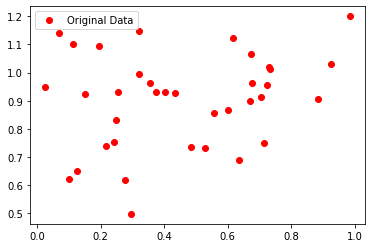

In [59]:
X = tf.random.uniform(minval=0, maxval=1, shape=(36, ))
Y = 0.2 * X + 0.8 + tf.random.normal(mean=0, stddev=0.15, shape=(36, ))

fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (14,7)
plt.rcParams['figure.facecolor'] = 'w'
ax.plot(X, Y, 'ro', label='Original Data')
plt.legend()
plt.show()

In [60]:
trainX, testX = tf.split(X, num_or_size_splits=[30,6])
trainY, testY = tf.split(Y, num_or_size_splits=[30,6])

In [61]:
ds_train = tf.data.Dataset.from_tensor_slices((trainX, trainY))

In [62]:
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [63]:
print(W.numpy(), b.numpy())

0.22816595 -0.46764392


In [64]:
def linear_regression(x):
    return tf.add(tf.multiply(W,x), b)

def mean_square(ypred, y):
    return tf.reduce_mean(tf.square(y - ypred))

optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [65]:
num_epochs = 100
log_steps = 50
batch_size = 5
steps_per_epoch = int(np.ceil(len(ds_train)/ batch_size))

L = []
ds_train = ds_train.shuffle(buffer_size=len(ds_train)).batch(batch_size).repeat(count=num_epochs)
len(ds_train)

600

In [66]:
for i, batch in enumerate(ds_train):
    bX, bY = batch
    with tf.GradientTape() as tape: #yield랑 비슷하게 메모리 관리차원에서 하는건가..?
        pred = linear_regression(bX)
        loss = mean_square(pred, bY)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if i % log_steps == 0 :
        print( i, loss.numpy(), W.numpy(), b.numpy())
        L.append(loss.numpy())

0 1.6641483 0.23744358 -0.44189835
50 0.18408935 0.53937805 0.27384108
100 0.060186125 0.6113662 0.49091688
150 0.072458945 0.61483467 0.5648066
200 0.02058868 0.5994135 0.5905551
250 0.017039558 0.58162963 0.60864234
300 0.07370056 0.5613106 0.62163526
350 0.016821293 0.54099214 0.62795824
400 0.014402284 0.5232214 0.6394349
450 0.010918583 0.50501066 0.6471519
500 0.047718745 0.48879895 0.65789455
550 0.06896001 0.4727678 0.6662418


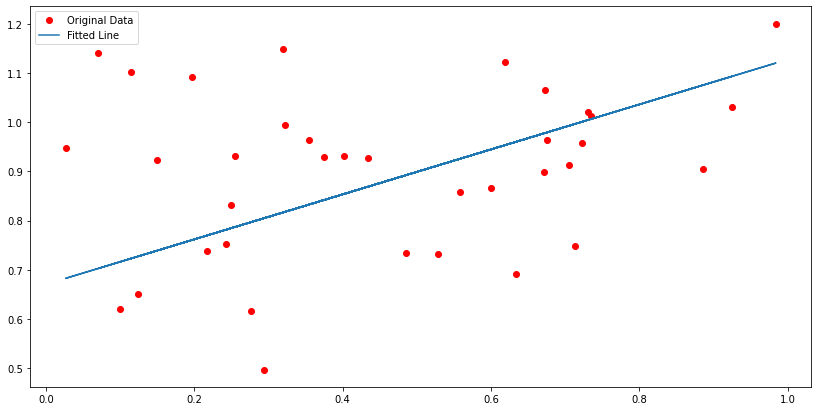

In [67]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (14,7)
plt.rcParams['figure.facecolor'] = 'w'
ax.plot(X, Y, 'ro', label='Original Data')
ax.plot(X, np.array( W*X + b), label='Fitted Line')
plt.legend()
plt.show()

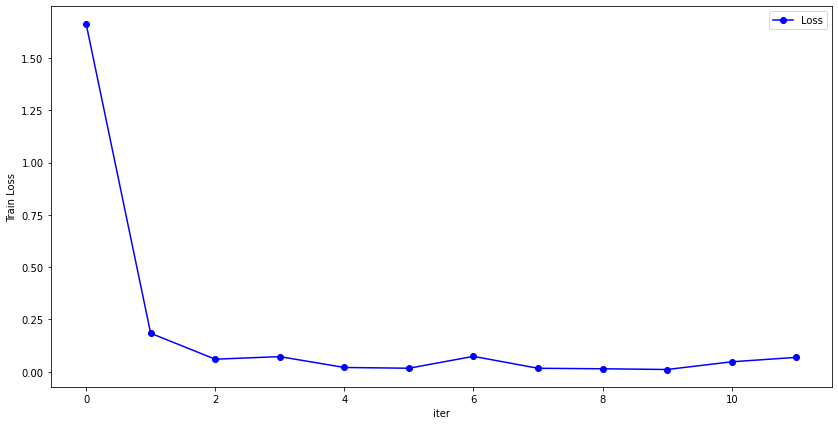

In [68]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (14,7)
plt.rcParams['figure.facecolor'] = 'w'
ax.plot(L, '-bo', label='Loss')
ax.set_xlabel('iter')
ax.set_ylabel('Train Loss')
plt.legend()
plt.show()

In [69]:
tpred = linear_regression(testX)
test_mse = mean_square(tpred, testY)
test_mse.numpy()

0.06133175

## 7. 선형회귀분석 (tf.keras의 모델 활용한 방식)

In [70]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim = 1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [71]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)

In [72]:
history = model.fit(trainX, trainY, epochs=100, batch_size=5, shuffle=True, verbose=1)

Epoch 1/100


2022-09-16 15:24:55.141038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 2ms/step - loss: 0.1776
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1658
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1562
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1495
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1440
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1394
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1355
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1324
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1296
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1274
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1258
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1241
Epoch 13/100
6/6 [==============================] - 0s 2ms/step - loss: 0

In [73]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.89331704]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.46838346], dtype=float32)>]

In [74]:
W2 = model.weights[0][0][0]
b2 = model.weights[1][0]
print(W2, b2)

tf.Tensor(0.89331704, shape=(), dtype=float32) tf.Tensor(0.46838346, shape=(), dtype=float32)


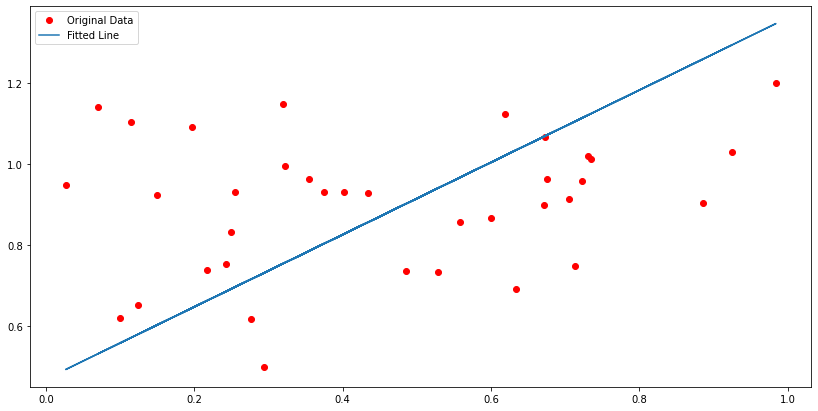

In [75]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (14,7)
plt.rcParams['figure.facecolor'] = 'w'
ax.plot(X, Y, 'ro', label='Original Data')
ax.plot(X, np.array( W2*X + b2), label='Fitted Line')
plt.legend()
plt.show()

In [76]:
tpred2 = model.predict(testX)
test_mse2 = mean_square(tpred2, testY)
test_mse2.numpy()

2022-09-16 15:24:57.337066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.105758175

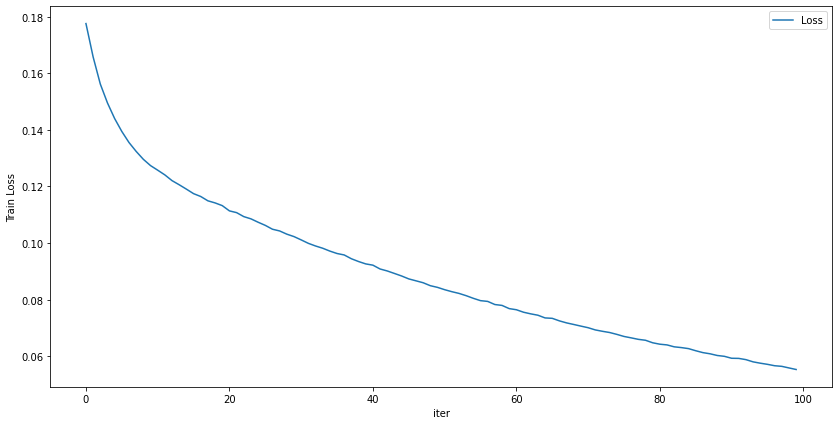

In [77]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (14,7)
plt.rcParams['figure.facecolor'] = 'w'
ax.plot(history.history['loss'], label='Loss')
ax.set_xlabel('iter')
ax.set_ylabel('Train Loss')
plt.legend()
plt.show()

AttributeError: 'History' object has no attribute 'numpy'

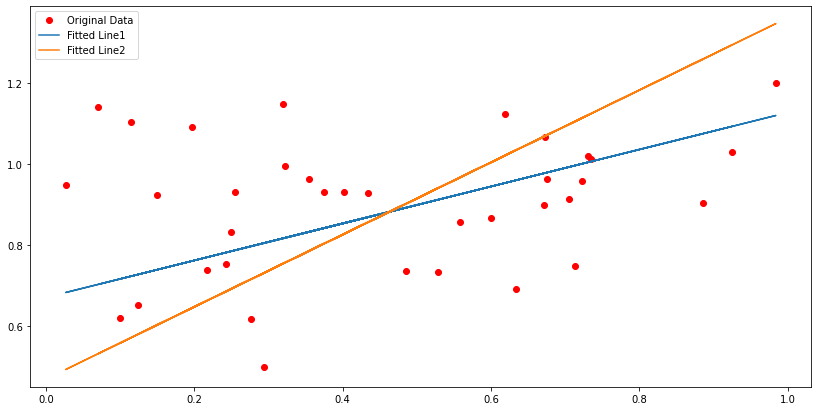

In [78]:
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (14,7)
plt.rcParams['figure.facecolor'] = 'w'
ax.plot(X, Y, 'ro', label='Original Data')
ax.plot(X, np.array( W*X + b), label='Fitted Line1')
ax.plot(X, np.array( W2*X + b2), label='Fitted Line2')
plt.legend()
plt.show()